<a href="https://colab.research.google.com/github/gabriel-drs/ml_regression/blob/main/Regress%C3%A3o_Linear_M%C3%BAltiplaLead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carregando os dados

In [ ]:
df = pd.read_csv('car_data.csv') #Usamos para carregar o arquivo dos dados
df.head(12)

(301, 9)


In [ ]:
print(df.shape) #Mostra o tamanho de registros

(301, 9)


Faremos algumas pequenas alterações. Mudaremos os textos para números

In [ ]:
df['tipo_transmissao'].replace({'Manual' : 0, 'Automatico' : 1}, inplace = True)
df['tipo_vendedor'].replace({'Revendedor' : 0, 'Individual' : 1}, inplace = True)
df['tipo_combustivel'].replace({'Gasolina' : 0, 'Diesel' : 1, 'GasNatural' : 2}, inplace = True)
df.head(21)

Gerando um gráfico sobre os anos dos carros e suas vendas

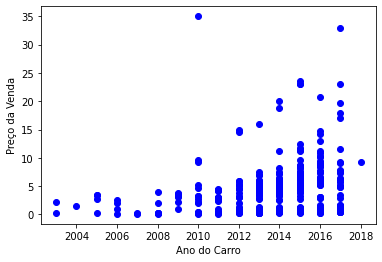

In [ ]:
plt.scatter(df['ano'], df['preco_venda'], color = 'blue')
plt.xlabel('Ano do Carro')
plt.ylabel('Preço da Venda')
plt.show()

Agora faremos um gráfico com o ano dos carros mais rodados

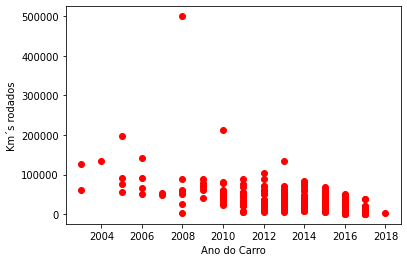

In [ ]:
plt.scatter(df['ano'], df['kms_rodados'], color = 'red')
plt.xlabel('Ano do Carro')
plt.ylabel('Km´s rodados')
plt.show()

Agora que já montamos nossos gráficos, iremos para a parte de previsão. Começaremos separando variáveis dependentes das independentes

In [ ]:
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]
#Essas serão nossas variáveis independentes

In [ ]:
y = df[['preco_venda']]
#Nossa variável dependente

Agora, separaremos os dados de treinos e de testes

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)
#x_treino e y_treino são usados para treinar o modelo
#x_teste usada para fazer as predições após os testes
#y_teste repostas usadas para treinar o algoritmo

In [ ]:
#Vamor dar uma olhada no número de registro que serção usados no teste e treino?
print('Treino')
print('x_train: ', x_treino.shape)
print('y_train: ', y_treino.shape)

print('\nTeste')
print('x_test: ', x_teste.shape)
print('y_test: ', y_teste.shape)

Treino
x_train:  (240, 7)
y_train:  (240, 1)

Teste
x_test:  (61, 7)
y_test:  (61, 1)


Agora, iremos treinar o modelo

In [ ]:
from sklearn.linear_model import LinearRegression

#Define o modelo
model = LinearRegression()

#Treina o modelo com os dados de treino
model.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
#Realiza a previsão
y_pred = model.predict(x_teste)

print(y_pred.shape)
print(y_teste.shape)

(61, 1)
(61, 1)


Vamos gerar os gráficos da previsão agora?

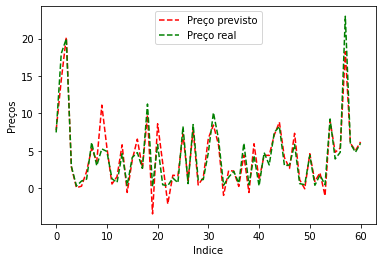

In [ ]:
plt.plot(range(y_pred.shape[0]), y_pred, 'r--')
plt.plot(range(y_teste.shape[0]), y_teste, 'g--')
plt.legend(['Preço previsto', 'Preço real'])
plt.xlabel('Indice')
plt.ylabel('Preços')
plt.show()

Para saber o quanto o nosso modelo está explicando os dados, ou o quanto o modelo pode prever corretamente,
iremos utilizar a medida r2, que é o coeficiente de determinação. Para isso iremos utilizar os dados da resposta
na etapa de teste e os dados de resposta previstos.

In [ ]:
from sklearn.metrics import r2_score
print('r2_score: ', r2_score(y_teste, y_pred))

r2_score:  0.8877609040728183


Quanto mais perto de 1, mais o modelo é capaz de prever corretamente. Em porcentagem, ele está prevendo cerca de 88% dos preços corretamente

Vamos praticar mais?

In [ ]:
#Vamos começar separando os dados Dependentes e Independentes

new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

In [ ]:
#Agora separaremos os de treino e de testes
from sklearn.model_selection import train_test_split

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2)
#x_treino e y_treino são usados para treinar o modelo
#x_teste usada para fazer as predições após os testes
#y_teste repostas usadas para treinar o algoritmo

In [ ]:
#Vamor dar uma olhada no número de registro que serção usados no teste e treino?
print('Treino')
print('new_x_train: ', new_x_train.shape)
print('new_y_train: ', new_y_train.shape)

print('\nTeste')
print('new_x_test: ', new_x_test.shape)
print('new_y_test: ', new_y_test.shape)

Treino
new_x_train:  (240, 4)
new_y_train:  (240, 1)

Teste
new_x_test:  (61, 4)
new_y_test:  (61, 1)


In [ ]:
#Agora vamos treinar o nosso modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression() #Definindo o modelo
model.fit(new_x_train, new_y_train) #Treinando ele

LinearRegression()

In [ ]:
#Agora realizaremos a previsão
new_y_pred = model.predict(new_x_test)

print(new_y_pred.shape)
print(new_y_test.shape)

(61, 1)
(61, 1)


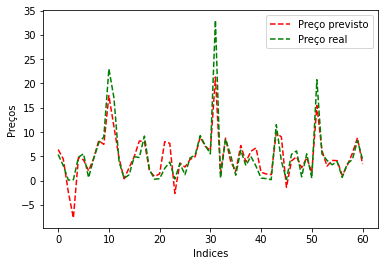

In [ ]:
#Vamos gerar os gráficos
plt.plot(range(new_y_pred.shape[0]), new_y_pred, 'r--')
plt.plot(range(new_y_test.shape[0]), new_y_test, 'g--')
plt.legend(['Preço previsto', 'Preço real'])
plt.xlabel('Indices')
plt.ylabel('Preços')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print('r2_score: ', r2_score(new_y_test, new_y_pred))

r2_score:  0.7788839484777692
